In [1]:
import numpy as np
import tensorflow as tf
import constant
import matplotlib.pyplot as plt

In [2]:
args = constant.Args
arg_keys = [arg for arg in args.__dict__.keys() if '__' not in arg]

print('Constants and hyperparameters in args:')
print(arg_keys)

Constants and hyperparameters in args:
['gpu', 'batch_A', 'batch_I', 'layer', 'k_A', 'layer_sizes', 'layers', 'layer_blk_sizes', 'blk_headers', 'num_classes', 'img_width', 'img_height']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


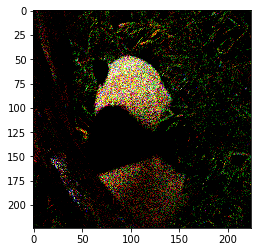

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


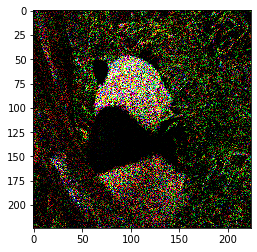

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


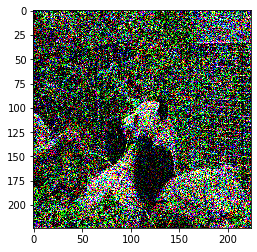

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


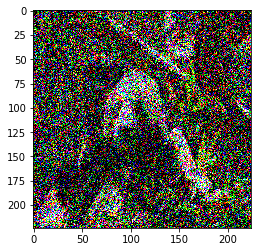

In [3]:
attacked_dirpath = '/Users/haekyu/data/massif/attacked/panda-armadillo'
epss = [0.5, 1.0, 1.5, 2.0]
for eps in epss:
    attacked_datapath = '{}/{}-{}.npy'.format(attacked_dirpath, 'attacked', eps)
    data = np.load(attacked_datapath)
    plt.imshow(data[0])
    plt.show()

In [6]:
from massif.model import InceptionV1Model


In [7]:
def get_predictions(model, imgs):
    graph = tf.Graph()
    with tf.Session(graph=graph) as sess:
        x = tf.placeholder(tf.float32, (None, 224, 224, 3))
        y = model.get_probs(x)
        y = tf.argmax(y, 1)
        y_eval = sess.run(y, feed_dict={x: imgs})

    # One batch
    y_eval = y_eval[0]

    return y_eval

model = InceptionV1Model()

In [8]:
predicted_class = get_predictions(model, [data[3]])
predicted_class

178